In [1]:
from sklearn import preprocessing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train=pd.read_csv("C:/Users/Administrator/Downloads/train.csv")
test=pd.read_csv("C:/Users/Administrator/Downloads/test.csv")
submit=pd.read_csv("C:/Users/Administrator/Downloads/gender_submission.csv")

In [33]:
train.info()
test.info()
#發現有遺失值

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float

In [49]:
#觀察是否有離群值
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [50]:
test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [35]:
# 合併檔案
data=train.append(test)
data
data.reset_index(inplace=True,drop=True)
#data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
Age            1046 non-null float64
Cabin          295 non-null object
Embarked       1307 non-null object
Fare           1308 non-null float64
Name           1309 non-null object
Parch          1309 non-null int64
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Sex            1309 non-null object
SibSp          1309 non-null int64
Survived       891 non-null float64
Ticket         1309 non-null object
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB


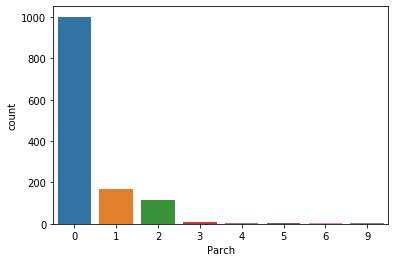

In [48]:
sns.countplot(data['Parch'])

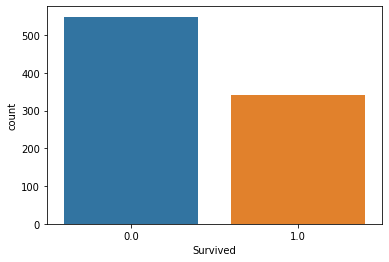

In [11]:
sns.countplot(data['Survived'])

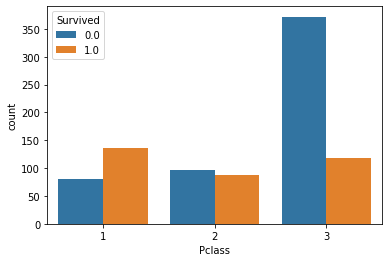

In [12]:
sns.countplot(data['Pclass'],hue=data['Survived'])
#還需觀察不同變項
# 用於類別型數據

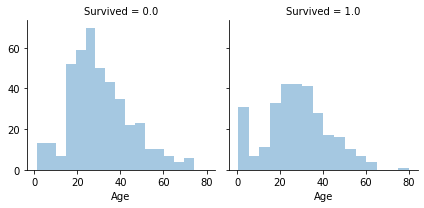

In [13]:
g=sns.FacetGrid(data,col='Survived')
g.map(sns.distplot,"Age",kde=False)
#用於連續型數據

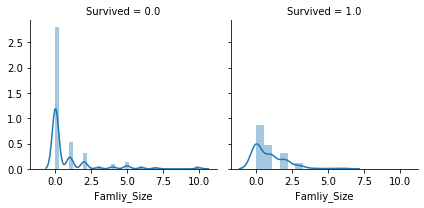

In [14]:
data['Famliy_Size']=data['Parch']+data['SibSp']
g=sns.FacetGrid(data,col="Survived")
g.map(sns.distplot,"Famliy_Size",kde=True)

In [15]:
data['Title1']=data['Name'].str.split(", ",expand=True)[1]
data['Title1'].head()

0                               Mr. Owen Harris
1    Mrs. John Bradley (Florence Briggs Thayer)
2                                   Miss. Laina
3            Mrs. Jacques Heath (Lily May Peel)
4                             Mr. William Henry
Name: Title1, dtype: object

In [16]:
data['Title1']=data['Title1'].str.split(".",expand=True)[0]
data['Title1'].head()

0      Mr
1     Mrs
2    Miss
3     Mrs
4      Mr
Name: Title1, dtype: object

In [17]:
data['Title1'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess',
       'Jonkheer', 'Dona'], dtype=object)

In [18]:
pd.crosstab(data['Title1'],
           data['Sex']).T.style.background_gradient(cmap='summer_r')

Title1,Capt,Col,Don,Dona,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir,the Countess
Sex,,,,,,,,,,,,,,,,,,
female,0,0,0,1,1,0,1,0,0,260,2,1,0,197,2,0,0,1
male,1,4,1,0,7,1,0,2,61,0,0,0,757,0,0,8,1,0


In [19]:
data["Title2"]=data['Title1'].replace(['Mlle','Mme','Ms',"Dr","Major",'Lady',
                                      'the Countess','Jonkheer',"Col","Rev","Capt","Sir",'Don','Dona'],
                                     ['Miss','Mrs','Miss','Mr','Mr','Mrs','Mrs','Mr','Mr','Mr','Mr','Mr','Mr','Mrs'])

In [20]:
data['Title2'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master'], dtype=object)

In [21]:
data['Ticket'].head()

0           A/5 21171
1            PC 17599
2    STON/O2. 3101282
3              113803
4              373450
Name: Ticket, dtype: object

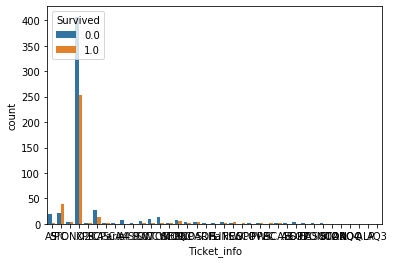

In [22]:
data['Ticket_info']=data['Ticket'].apply(lambda x:
                                        x.replace(".","").replace("/","").strip().split(" ")[0]if 
                                        not x.isdigit() else "X")
data["Ticket_info"].unique()
sns.countplot(data['Ticket_info'], hue=data["Survived"])


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 16 columns):
Age            1046 non-null float64
Cabin          1309 non-null object
Embarked       1309 non-null object
Fare           1309 non-null float64
Name           1309 non-null object
Parch          1309 non-null int64
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Sex            1309 non-null object
SibSp          1309 non-null int64
Survived       891 non-null float64
Ticket         1309 non-null object
Famliy_Size    1309 non-null int64
Title1         1309 non-null object
Title2         1309 non-null object
Ticket_info    1309 non-null object
dtypes: float64(3), int64(5), object(8)
memory usage: 163.8+ KB


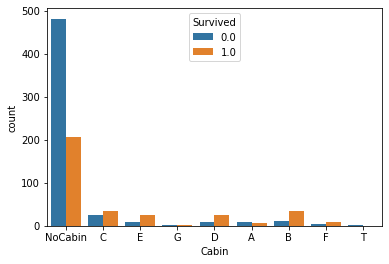

In [23]:
data['Embarked']=data['Embarked'].fillna('S')
data['Fare']=data['Fare'].fillna(data['Fare'].mean())
#data['Cabin'].head(10)
data['Cabin']=data['Cabin'].apply(lambda x :str(x)[0] if not pd.isnull(x)
                                 else 'NoCabin')
data["Cabin"].unique()
sns.countplot(data['Cabin'], hue=data['Survived'])
data.info()

In [24]:
data['Sex']=data['Sex'].astype('category').cat.codes
data['Embarked']=data['Embarked'].astype('category').cat.codes
data['Pclass']=data['Pclass'].astype('category').cat.codes
data['Title1']=data['Title1'].astype('category').cat.codes
data['Title2']=data['Title2'].astype('category').cat.codes
data['Cabin']=data['Cabin'].astype('category').cat.codes
data['Ticket_info']=data['Ticket_info'].astype('category').cat.codes

In [25]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
dataAgeNull=data[data['Age'].isnull()]
dataAgeNotNull=data[data['Age'].notnull()]
remove_outlier=dataAgeNotNull[(np.abs(dataAgeNotNull['Fare']-
                dataAgeNotNull['Fare'].mean())>(4*dataAgeNotNull['Fare'].std())) |
                             (np.abs(dataAgeNotNull['Famliy_Size']-
                dataAgeNotNull["Famliy_Size"].mean())>(4*dataAgeNotNull['Famliy_Size'].std()))]
rfModel_age=RandomForestRegressor(n_estimators=2000,random_state=42)
ageColumns=['Embarked','Fare','Pclass','Sex','Famliy_Size','Title1','Title2','Cabin','Ticket_info']
rfModel_age.fit(remove_outlier[ageColumns],remove_outlier['Age'])
ageNullValues=rfModel_age.predict(X=dataAgeNull[ageColumns])
dataAgeNull.loc[:,'Age']=ageNullValues
data=dataAgeNull.append(dataAgeNotNull)
data.reset_index(inplace=True,drop=True)

C:\Users\Administrator\Anaconda3\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [26]:
dataTrain=data[pd.notnull(data['Survived'])].sort_values(by=['PassengerId'])
dataTest=data[~pd.notnull(data['Survived'])].sort_values(by=['PassengerId'])

In [27]:
dataTrain.columns

Index(['Age', 'Cabin', 'Embarked', 'Fare', 'Name', 'Parch', 'PassengerId',
       'Pclass', 'Sex', 'SibSp', 'Survived', 'Ticket', 'Famliy_Size', 'Title1',
       'Title2', 'Ticket_info'],
      dtype='object')

In [28]:
dataTrain=dataTrain[['Survived','Age','Embarked','Fare','Pclass','Sex',
                    'Famliy_Size','Title2','Ticket_info','Cabin']]
dataTest=dataTest[['Age','Embarked','Fare','Pclass','Sex',
                    'Famliy_Size','Title2','Ticket_info','Cabin']]

In [29]:
#dataTrain

In [30]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(criterion='gini',
                          n_estimators=1000,
                          min_samples_split=12,
                          min_samples_leaf=1,
                          oob_score=True,
                          random_state=1,
                          n_jobs=-1)
rf.fit(dataTrain.iloc[:,1:],dataTrain.iloc[:,0])
print("%.4f" % rf.oob_score_)

0.8294


In [31]:
pd.concat((pd.DataFrame(dataTrain.iloc[:,1:].columns,columns=['variable']),
               pd.DataFrame(rf.feature_importances_,columns=['importance'])),axis=1).sort_values(by='importance',ascending=False)[:20]

rf_res=rf.predict(dataTest)
submit['Survived']=rf_res
submit['Survived']=submit['Survived'].astype(int)
submit.to_csv('submit.csv',index=False)